In [56]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.model_selection import train_test_split as TimeSeriesSplit
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score as AS, confusion_matrix as CM

In [57]:
data = pd.read_csv('Titanic-Dataset.csv')

In [58]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [59]:
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [61]:
data.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [63]:
le = {}
for column in ['Sex', 'Embarked']:
    le[column] = LE()
    data[column] = le[column].fit_transform(data[column])

In [64]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [65]:
data.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2

In [66]:
X = data.drop(columns=['Survived'])
y = data['Survived']

In [67]:
X_train,X_test,y_train,y_test = TimeSeriesSplit(X,y,test_size=0.2,random_state=2)

In [68]:
lr = LR(max_iter=1000)
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print("Accuracy Score: ", AS(y_test, y_pred))
print("Confusion Matrix: ", CM(y_test, y_pred))

Accuracy Score:  0.7877094972067039
Confusion Matrix:  [[91  9]
 [29 50]]


In [69]:
# Visuallization.

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

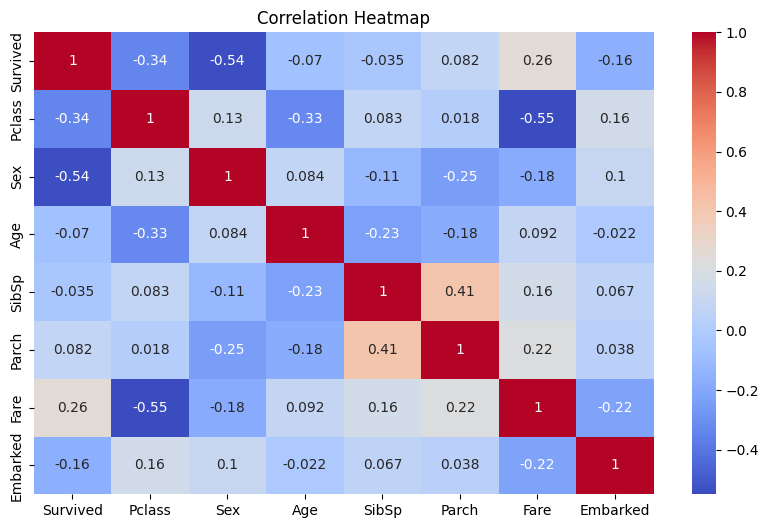

In [71]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [92]:
# AS = int(AS(y_test, y_pred))

In [96]:
data1 = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

In [99]:
# Using Testing data visuallization...

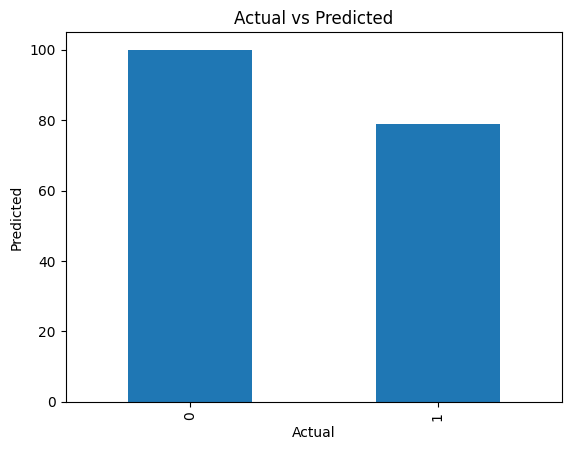

In [109]:
data1['y_test'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [100]:
# Using Predicted data Visuallization...

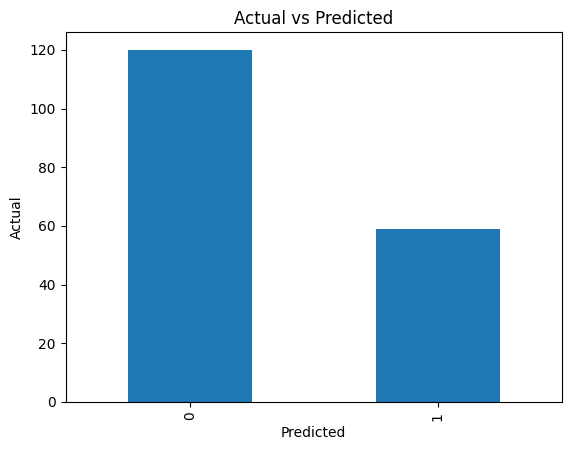

In [105]:
data1['y_pred'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted')
plt.show()